# Question 1 - Extracting Tesla Stock Data Using yfinance

In [8]:
import yfinance as yf

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history()

# Reset the index for better readability
tesla_data.reset_index(inplace=True)

# Display the first few rows
print(tesla_data.head())


                       Date        Open        High         Low       Close  \
0 2024-12-11 00:00:00-05:00  409.700012  424.880005  402.380005  424.769989   
1 2024-12-12 00:00:00-05:00  424.839996  429.299988  415.000000  418.100006   
2 2024-12-13 00:00:00-05:00  420.000000  436.299988  415.709991  436.230011   
3 2024-12-16 00:00:00-05:00  441.089996  463.190002  436.149994  463.019989   
4 2024-12-17 00:00:00-05:00  475.899994  483.989990  457.510010  479.859985   

      Volume  Dividends  Stock Splits  
0  104287600        0.0           0.0  
1   87752200        0.0           0.0  
2   89000200        0.0           0.0  
3  114083800        0.0           0.0  
4  131223000        0.0           0.0  


# Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
soup = BeautifulSoup(response.text,"html.parser")

table= soup.find_all("tbody")[1]
rows = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    rows.append([col.text.strip() for col in cols])

tesla_revenue = pd.DataFrame(rows, columns=["Date", "Revenue"])
print(tesla_revenue.head())

         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


# Question 3 - Extracting GameStop Stock Data Using yfinance

In [10]:
GameStop = yf.Ticker("GME")
GameStop_Data = GameStop.history()

GameStop_Data.reset_index(inplace = True)
print(GameStop_Data.head())

                       Date       Open       High        Low      Close  \
0 2024-12-11 00:00:00-05:00  27.750000  30.160000  27.510000  28.969999   
1 2024-12-12 00:00:00-05:00  28.900000  29.660000  28.580000  28.750000   
2 2024-12-13 00:00:00-05:00  28.700001  28.860001  27.920000  27.990000   
3 2024-12-16 00:00:00-05:00  27.700001  29.590000  27.270000  29.440001   
4 2024-12-17 00:00:00-05:00  29.639999  31.879999  29.639999  31.260000   

     Volume  Dividends  Stock Splits  
0  20485000        0.0           0.0  
1   8855700        0.0           0.0  
2   6581600        0.0           0.0  
3   8700000        0.0           0.0  
4  19948100        0.0           0.0  


# Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [13]:
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
get = requests.get(url2)
soup2 = BeautifulSoup(get.text, "html.parser")

table= soup2.find_all("tbody")[1]
rows = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    rows.append([col.text.strip() for col in cols])

GameStop_revenue = pd.DataFrame(rows, columns=["Date", "Revenue"])
print(GameStop_revenue.head())


         Date Revenue
0  2020-04-30  $1,021
1  2020-01-31  $2,194
2  2019-10-31  $1,439
3  2019-07-31  $1,286
4  2019-04-30  $1,548


# Question 5 - Tesla Stock and Revenue Dashboard

<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
/var/folders/_h/s142zshd62dgzph0g945khy40000gn/T/ipykernel_3734/3001347729.py:6: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"].replace('[\$,]', '', regex=True), errors="coerce"


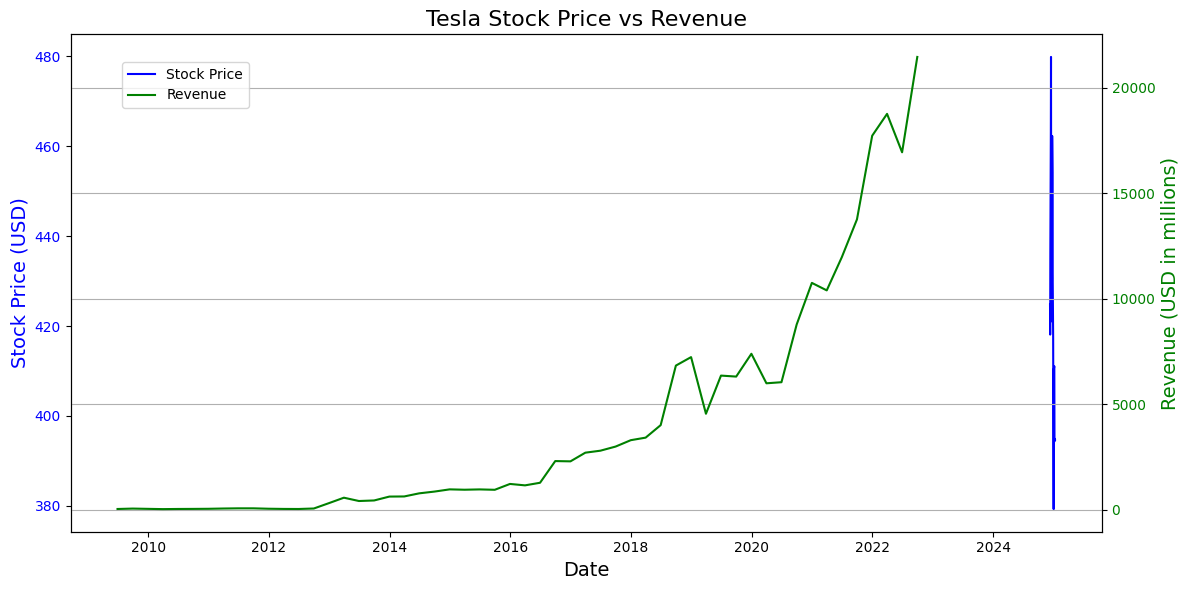

In [16]:
import matplotlib.pyplot as plt

tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]  # Remove empty strings
tesla_revenue["Revenue"] = pd.to_numeric(
    tesla_revenue["Revenue"].replace('[\$,]', '', regex=True), errors="coerce"
)
tesla_revenue.dropna(subset=["Revenue"], inplace=True)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot stock price
ax1.plot(tesla_data['Date'], tesla_data['Close'], color='blue', label='Stock Price')
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Stock Price (USD)', color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')

# Plot revenue on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(tesla_revenue['Date'], tesla_revenue['Revenue'], color='green', label='Revenue')
ax2.set_ylabel('Revenue (USD in millions)', color='green', fontsize=14)
ax2.tick_params(axis='y', labelcolor='green')

# Add title and legend
plt.title("Tesla Stock Price vs Revenue", fontsize=16)
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.grid()
plt.tight_layout()
plt.show()
